<a href="https://colab.research.google.com/github/elangbijak4/Blockchain_Research/blob/main/Blockchain3_DAG_dan_PoP_(Proof_of_Participants).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode di bawah telah dimodifikasi algoritma untuk memeriksa rantai hash yang sebelumnya algoritma untuk memeriksa rantai hash linier, sekarang menjadi algoritma Graf Hash DAG dengen menerapkan catatan Path Linier yang direpresentasikan oleh string path yang dicatat pada setiap blok. Proses validasi rantai hash adalah menuruti jejak Path Linier di dalam Graph DAG ini sampai ke Genesis.

In [66]:
import json
import hashlib
import time

In [53]:
class Block_Old:
    # Tambahkan atribut contract untuk menyimpan smart contract
    def __init__(self, index, previous_hashes, timestamp, data, hash, contract=None):
        self.index = index
        self.previous_hashes = previous_hashes
        self.timestamp = timestamp
        self.data = data
        self.hash = hash
        self.contract = contract

    @staticmethod
    def calculate_hash(index, previous_hashes, timestamp, data):
        value = str(index) + ''.join(previous_hashes) + str(timestamp) + data
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    @staticmethod
    def create_genesis_block():
        return Block(0, ["0"], time.time(), "Genesis Block", Block.calculate_hash(0, ["0"], time.time(), "Genesis Block"))

    def to_dict(self):
        return {
            'index': self.index,
            'previous_hashes': self.previous_hashes,
            'timestamp': self.timestamp,
            'data': self.data,
            'hash': self.hash,
            'contract': self.contract.contract_id if self.contract else None
        }

In [68]:
class Block:
    def __init__(self, index, previous_hashes, timestamp, data, hash, path, contract=None):
        self.index = index
        self.previous_hashes = previous_hashes
        self.timestamp = timestamp
        self.data = data
        self.hash = hash
        self.path = path
        self.contract = contract

    @staticmethod
    def calculate_hash(index, previous_hashes, timestamp, data):
        value = str(index) + ''.join(previous_hashes) + str(timestamp) + data
        return hashlib.sha256(value.encode('utf-8')).hexdigest()

    @staticmethod
    def create_genesis_block():
        return Block(0, ["0"], time.time(), "Genesis Block", Block.calculate_hash(0, ["0"], time.time(), "Genesis Block"), "G")

    def to_dict(self):
        return {
            'index': self.index,
            'previous_hashes': self.previous_hashes,
            'timestamp': self.timestamp,
            'data': self.data,
            'hash': self.hash,
            'path': self.path,
            'contract': self.contract.contract_id if self.contract else None
        }

In [69]:
class BlockchainDAG:
    def __init__(self):
        self.chain = [Block.create_genesis_block()]
        self.blocks = {self.chain[0].hash: self.chain[0]}  # Dictionary to store blocks by hash

    def get_latest_blocks(self, n=1):
        latest_blocks = sorted(self.chain, key=lambda x: x.timestamp, reverse=True)[:n]
        return latest_blocks

    def add_block(self, new_block):
        for previous_hash in new_block.previous_hashes:
            if previous_hash not in self.blocks:
                raise ValueError("One or more previous hashes not found in the chain")
        new_block.hash = Block.calculate_hash(new_block.index, new_block.previous_hashes, new_block.timestamp, new_block.data)
        self.chain.append(new_block)
        self.blocks[new_block.hash] = new_block

    def is_chain_valid(self):
        for block in self.chain:
            if block.path == "G":  # Skip Genesis Block
                continue
            calculated_hash = Block.calculate_hash(block.index, block.previous_hashes, block.timestamp, block.data)
            if block.hash != calculated_hash:
                return False
            previous_path = block.path[:-1]  # Remove last character to get previous path
            previous_block = None
            for b in self.chain:
                if b.path == previous_path:
                    previous_block = b
                    break
            if previous_block is None or previous_block.hash not in block.previous_hashes:
                return False
        return True

    def to_json(self):
        chain_data = [block.to_dict() for block in self.chain]
        return json.dumps(chain_data, indent=4)

In [60]:
class Validator:
    def __init__(self, name):
        self.name = name
        self.participation = 0

    def participate(self):
        self.participation += 1

class PoP:
    def __init__(self):
        self.validators = []

    def add_validator(self, validator):
        self.validators.append(validator)

    def select_validator(self):
        max_participation = max([v.participation for v in self.validators])
        for validator in self.validators:
            if validator.participation == max_participation:
                return validator

In [61]:
import networkx as nx
import matplotlib.pyplot as plt

class BlockchainVisualizer:
    def __init__(self, blockchain):
        self.blockchain = blockchain
        self.graph = nx.DiGraph()

    def build_graph(self):
        for block in self.blockchain.chain:
            self.graph.add_node(block.hash, label=f"Block {block.index}")
            for prev_hash in block.previous_hashes:
                self.graph.add_edge(prev_hash, block.hash)

    def draw_graph(self):
        pos = nx.spring_layout(self.graph)
        labels = nx.get_node_attributes(self.graph, 'label')
        nx.draw(self.graph, pos, with_labels=True, labels=labels, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
        plt.show()

In [62]:
class SmartContract:
    def __init__(self, contract_id, code):
        self.contract_id = contract_id
        self.code = code

    def execute(self, *args):
        exec(self.code, globals(), locals())
        return locals().get('result', None)

Selected Validator: Validator2
Blockchain is valid: True
Blockchain JSON representation:
[
    {
        "index": 0,
        "previous_hashes": [
            "0"
        ],
        "timestamp": 1720709810.057072,
        "data": "Genesis Block",
        "hash": "16b52467c4ad2849f26164004d4903be6acae622e74c0cd5dc0f83135ec5925e",
        "path": "G",
        "contract": null
    },
    {
        "index": 1,
        "previous_hashes": [
            "16b52467c4ad2849f26164004d4903be6acae622e74c0cd5dc0f83135ec5925e"
        ],
        "timestamp": 1720709810.0588768,
        "data": "Data Block 1",
        "hash": "e618cc313b7d9323c306142921cea720cad351d4b87b71bad1da8add699eb77e",
        "path": "Ga",
        "contract": null
    },
    {
        "index": 2,
        "previous_hashes": [
            "e618cc313b7d9323c306142921cea720cad351d4b87b71bad1da8add699eb77e"
        ],
        "timestamp": 1720709810.0590763,
        "data": "Data Block 2",
        "hash": "ad285c32fcba871f7ddab28c77

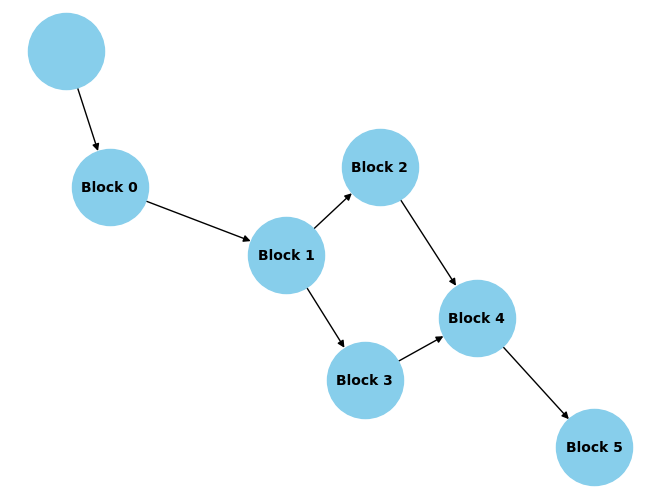

In [70]:
# Demo penggunaan dengan smart contract dan validasi yang diperbaiki menggunakan path linier
blockchain = BlockchainDAG()
pop = PoP()

validator1 = Validator("Validator1")
validator2 = Validator("Validator2")

pop.add_validator(validator1)
pop.add_validator(validator2)

# Simulating participation
validator1.participate()
validator2.participate()
validator2.participate()

selected_validator = pop.select_validator()
print(f"Selected Validator: {selected_validator.name}")

# Menambahkan beberapa blok untuk membentuk pencabangan
previous_hashes = [blockchain.get_latest_blocks()[0].hash]
new_block1 = Block(len(blockchain.chain), previous_hashes, time.time(), "Data Block 1", "", "Ga")
blockchain.add_block(new_block1)

previous_hashes = [new_block1.hash]
new_block2 = Block(len(blockchain.chain), previous_hashes, time.time(), "Data Block 2", "", "Gab")
blockchain.add_block(new_block2)

previous_hashes = [new_block1.hash]
new_block3 = Block(len(blockchain.chain), previous_hashes, time.time(), "Data Block 3", "", "Gac")
blockchain.add_block(new_block3)

previous_hashes = [new_block2.hash, new_block3.hash]
new_block4 = Block(len(blockchain.chain), previous_hashes, time.time(), "Data Block 4", "", "Gabd")
blockchain.add_block(new_block4)

print("Blockchain is valid:", blockchain.is_chain_valid())

print("Blockchain JSON representation:")
print(blockchain.to_json())

# Membuat smart contract
contract_code = """
def contract_function(x, y):
    result = x + y
result = contract_function(5, 10)
"""
smart_contract = SmartContract("contract1", contract_code)

# Menambahkan smart contract ke dalam blok
previous_hashes = [new_block4.hash]
new_block_with_contract = Block(len(blockchain.chain), previous_hashes, time.time(), "Smart Contract Block", "", "Gabde", contract=smart_contract)
blockchain.add_block(new_block_with_contract)

print("Blockchain with Smart Contract JSON representation:")
print(blockchain.to_json())

# Pemanggilan dan eksekusi smart contract
result = new_block_with_contract.contract.execute()
print("Smart Contract Execution Result:", result)

# Visualisasi DAG
visualizer = BlockchainVisualizer(blockchain)
visualizer.build_graph()
visualizer.draw_graph()